Goal of the Analysis
The goal of this data analysis is to derive insights and build a predictive model using the King County House Sales dataset (kc_house_data.csv). This dataset contains information about house sales in King County, including various attributes of the houses.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file into a DataFrame
df = pd.read_csv('kc_house_data.csv')

# DHead
print(df.head())

# Summary statistics of numerical columns
print(df.describe())

# Information about the dataset (columns, non-null counts, data types)
print(df.info())


           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  

In [13]:
#first 10 rows
first_10_rows =df.iloc[:10]
print(first_10_rows)

           id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0      

In [16]:
df_last_10 = df.tail(10)

print(df_last_10)

               id        date      price  bedrooms  bathrooms  sqft_living  \
21587  7852140040   8/25/2014   507250.0         3       2.50         2270   
21588  9834201367   1/26/2015   429000.0         3       2.00         1490   
21589  3448900210  10/14/2014   610685.0         4       2.50         2520   
21590  7936000429   3/26/2015  1010000.0         4       3.50         3510   
21591  2997800021   2/19/2015   475000.0         3       2.50         1310   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21595   291310100   1/16/2015   400000.0         3       2.50         1600   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
21587      5536     2.0         NaN   0.0  ...      8        2270   
215

In [17]:
#Data Cleaning

#Shape of data
df.shape

(21597, 21)

In [19]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [20]:
#finding missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [21]:
#%of missing values
df.isnull().sum()/df.shape[0]*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [22]:
#duplicates checking
df.duplicated().sum()


0

In [23]:
#garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/3/2014       1
5/15/2015      1
1/31/2015      1
11/2/2014      1
2/15/2015      1
Name: date, Length: 372, dtype: int64
******************************
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
666.0         1
518.0         1
792.0         1
374.0         1
2250.0        1
Name: sqft_basement, Length: 304, dtype: int64
******************************


In [25]:
# Replace '?' with 0 in sqft_basement column
df['sqft_basement'].replace('?', 0, inplace=True)

# Convert sqft_basement column to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

# Impute missing values with median
median_sqft_basement = df['sqft_basement'].median()
df['sqft_basement'].replace('?', median_sqft_basement, inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])


EDA

In [26]:
#Descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [29]:
df.describe(include = "object")

,date
count,21597
unique,372
top,6/23/2014
freq,142


In [35]:
##histogram
import warnings
warnings.filterwarnings("ignore")
for i in df.select_datatypes(include = "number").columns:
    sns.histplot(data = df, x = i)
    plt.show()

AttributeError: 'DataFrame' object has no attribute 'select_datatypes'

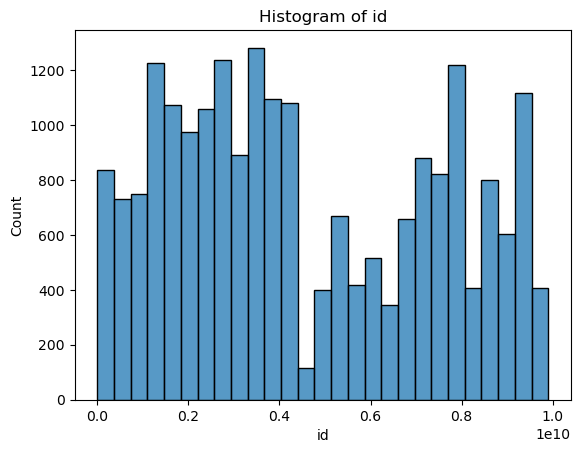

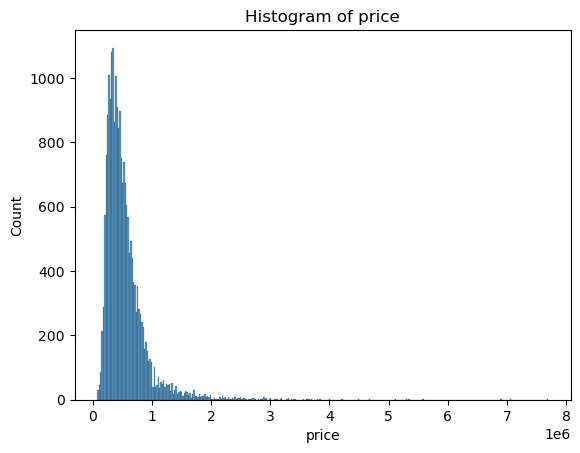

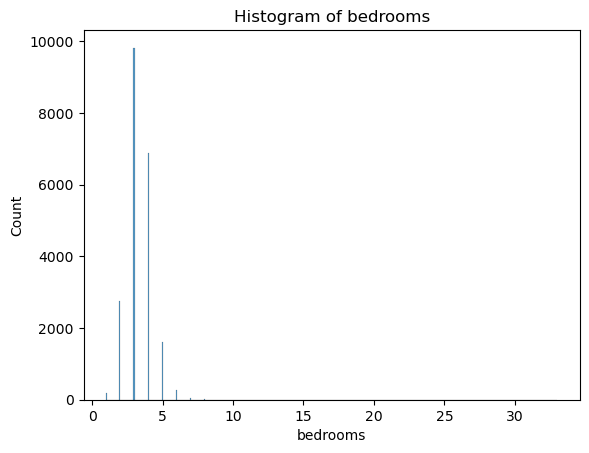

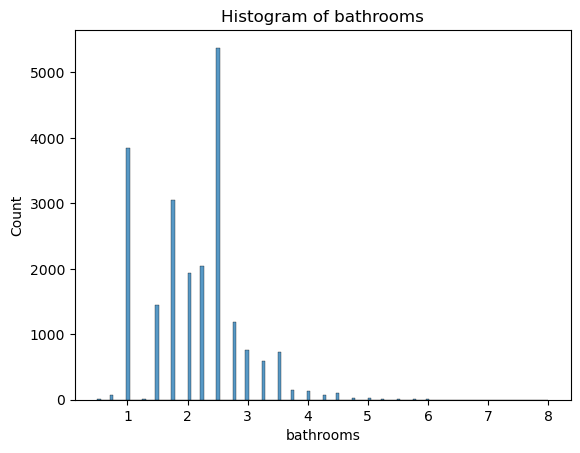

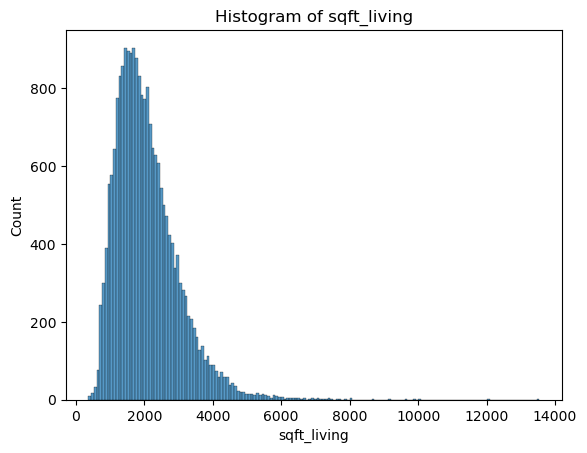

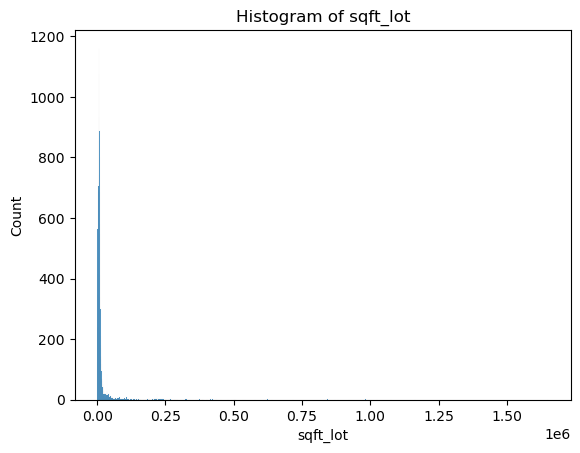

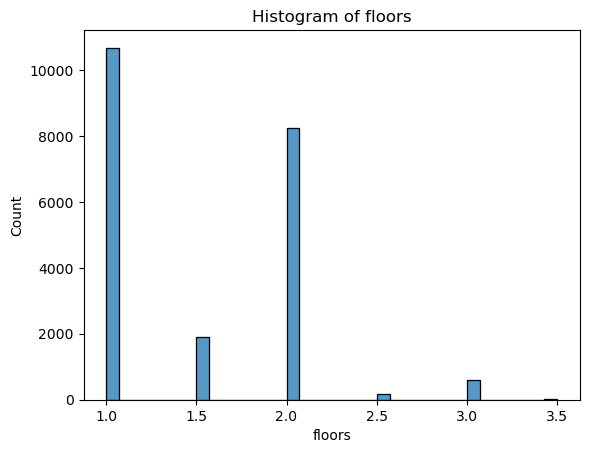

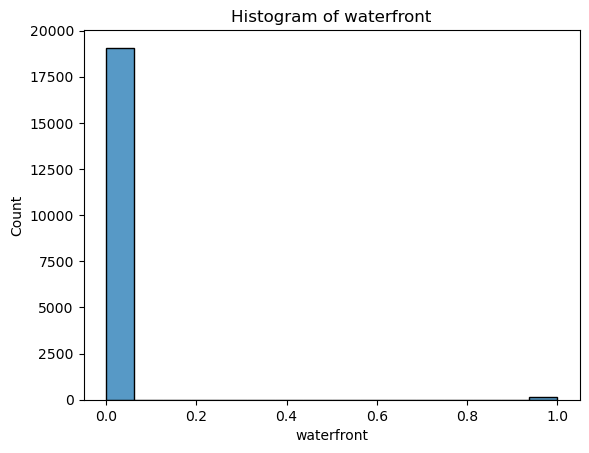

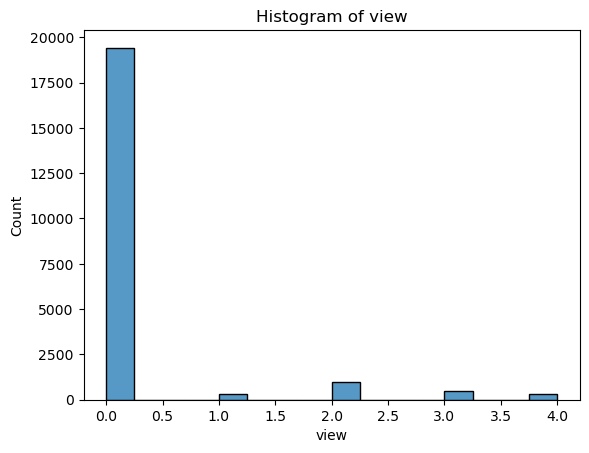

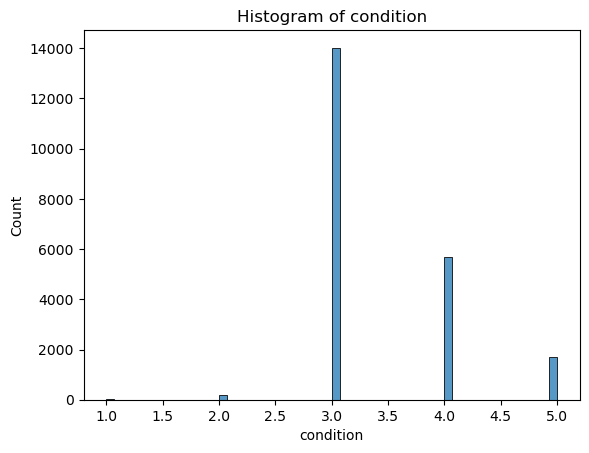

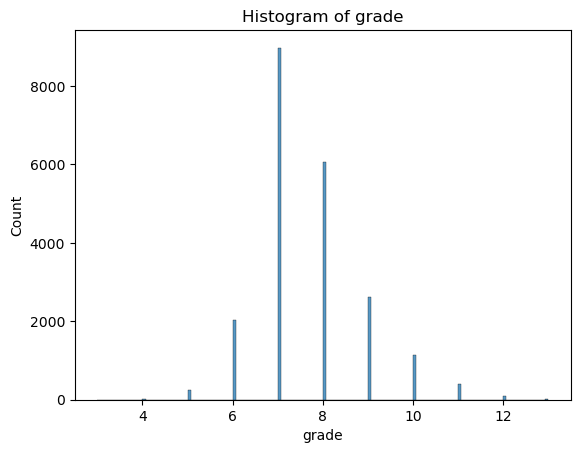

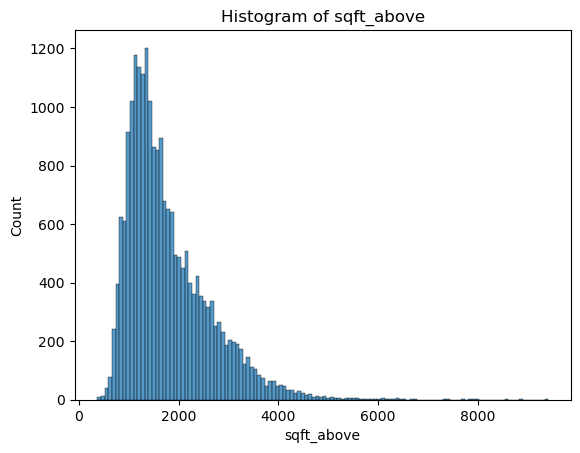

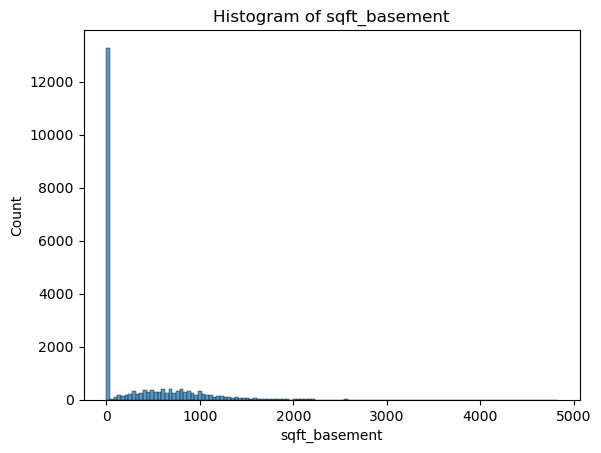

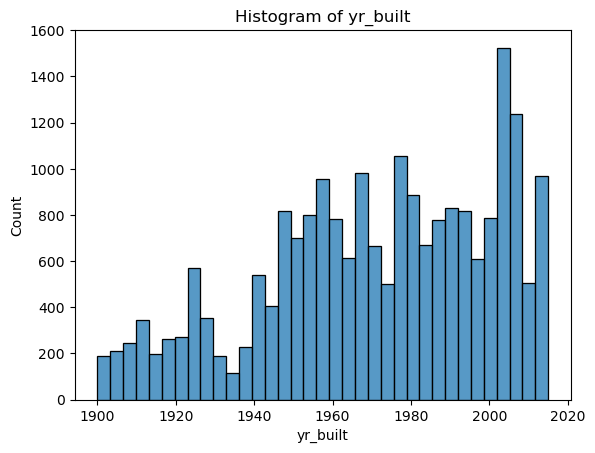

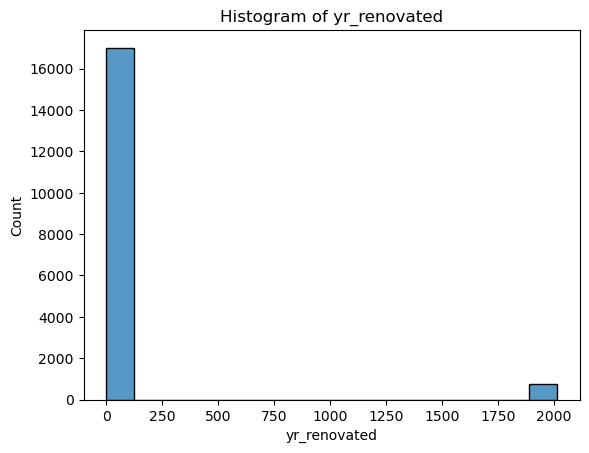

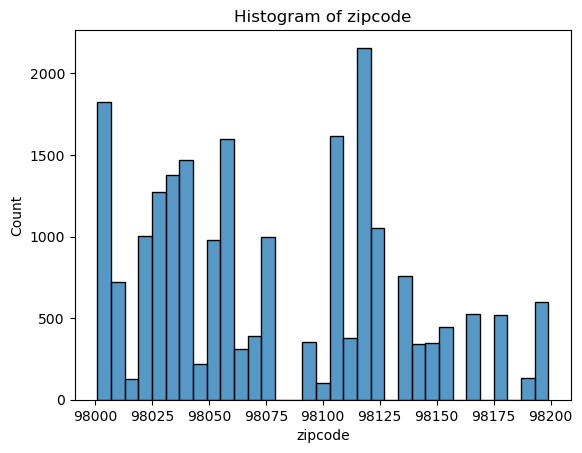

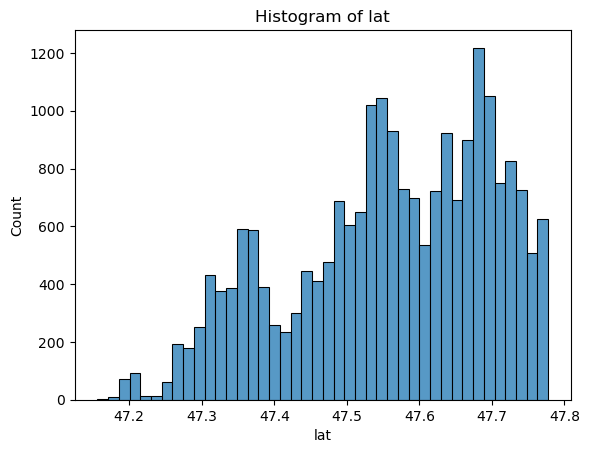

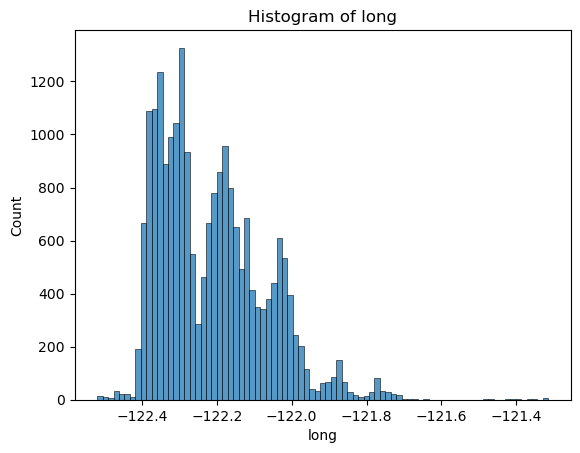

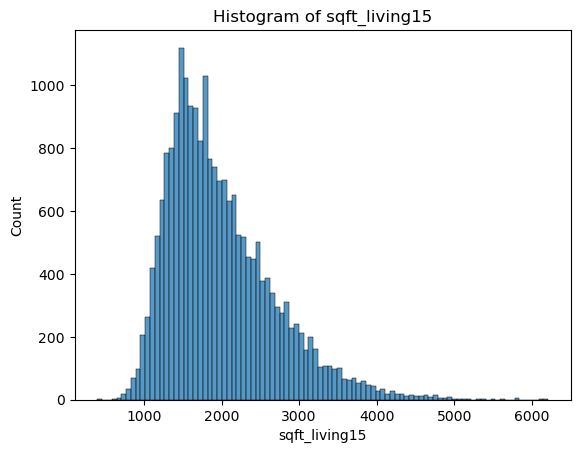

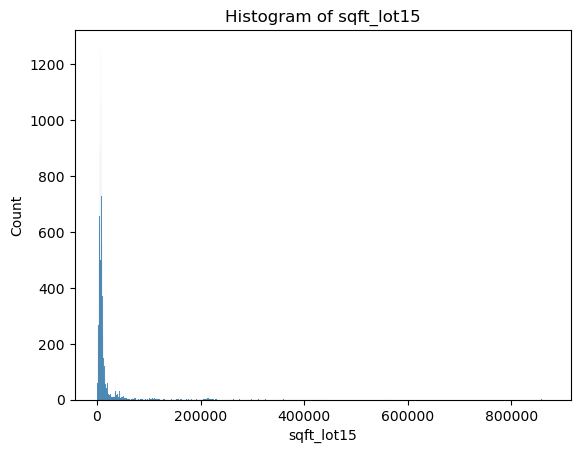

In [36]:
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    sns.histplot(data=df, x=column)
    plt.title(f'Histogram of {column}')
    plt.show()

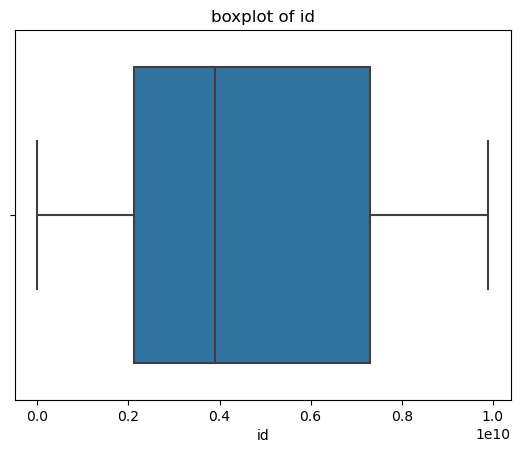

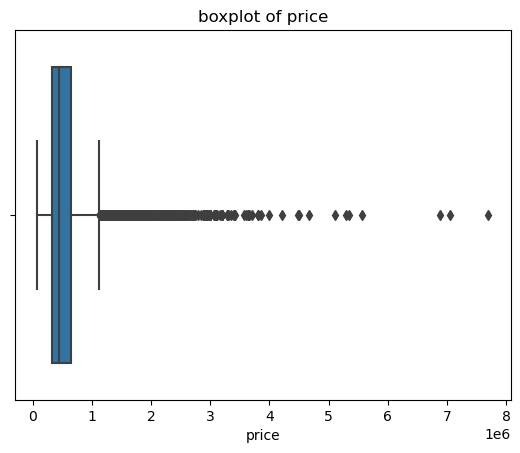

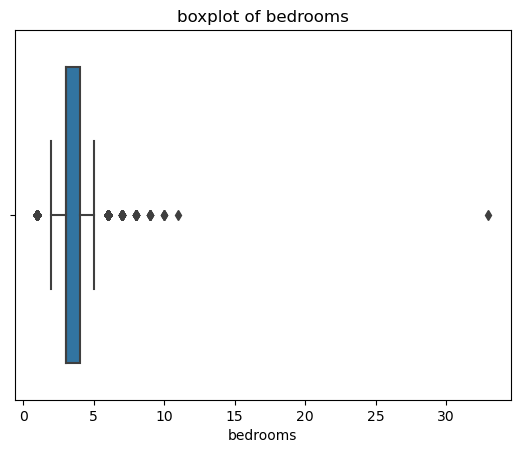

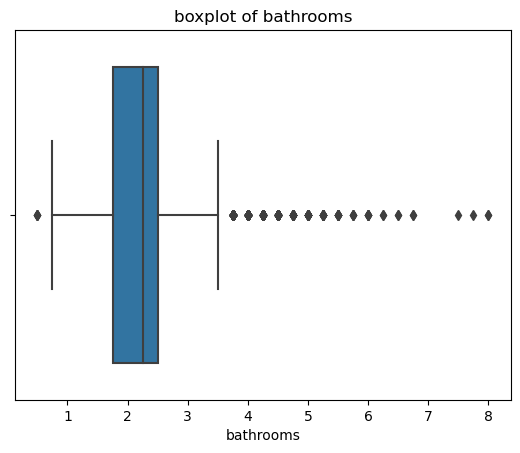

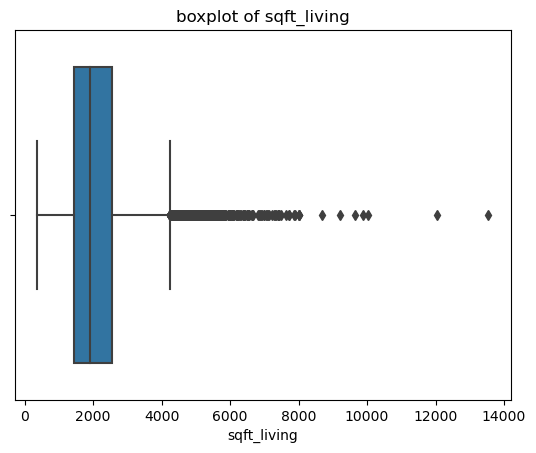

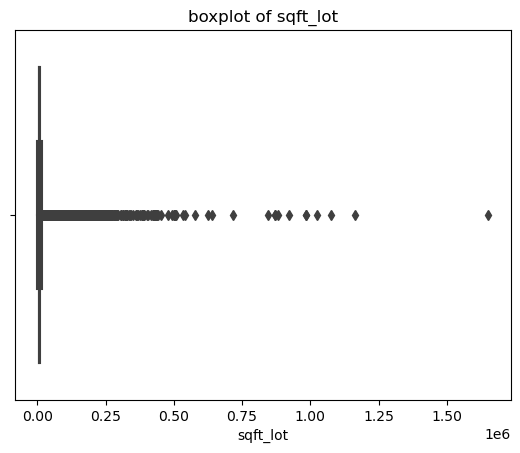

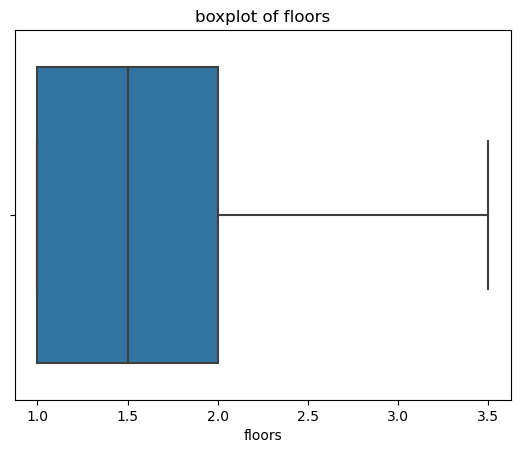

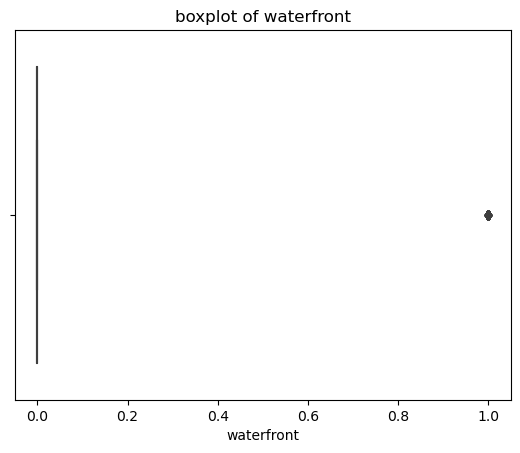

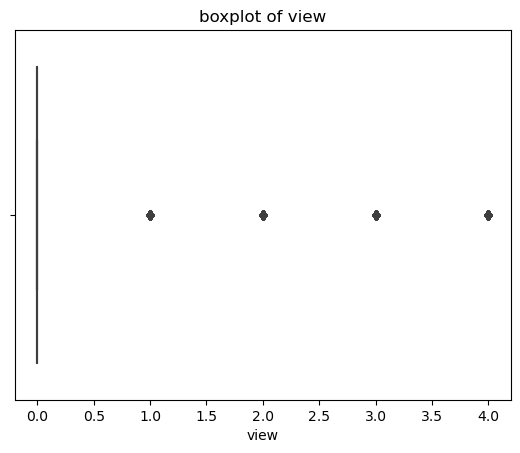

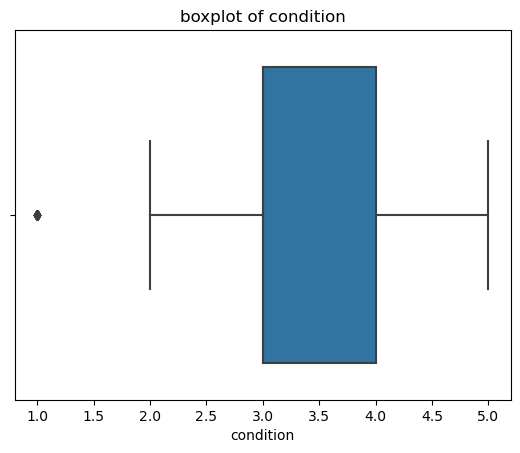

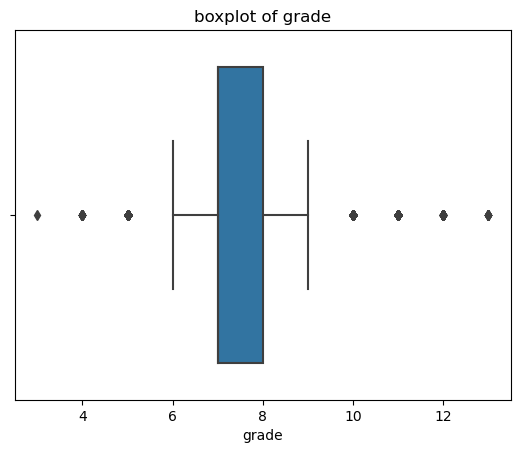

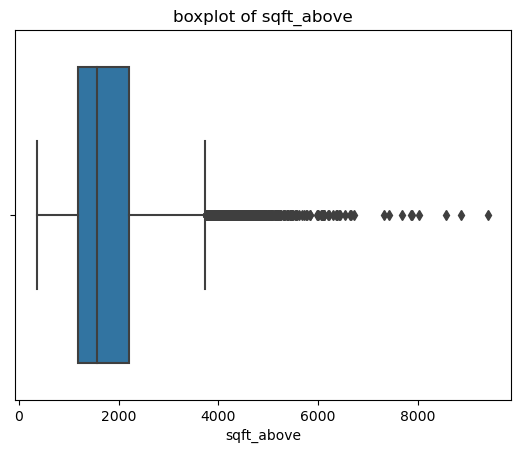

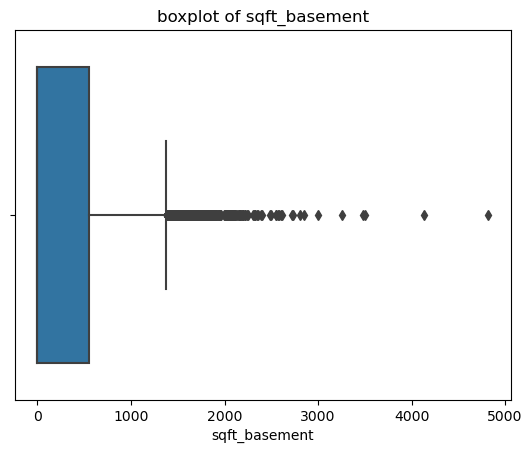

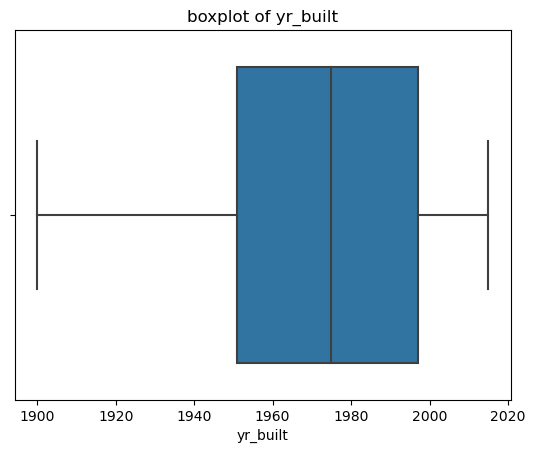

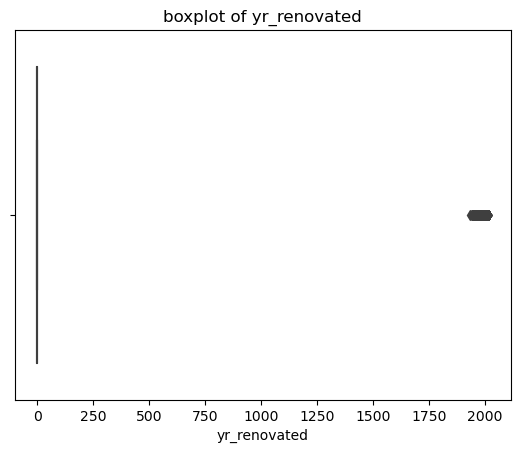

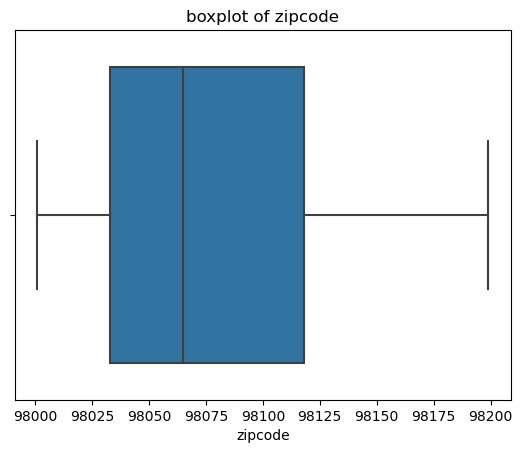

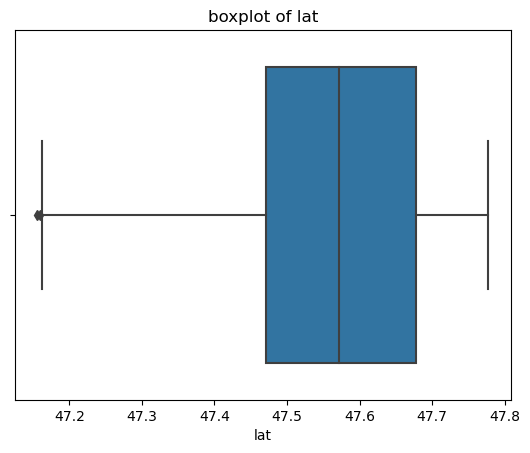

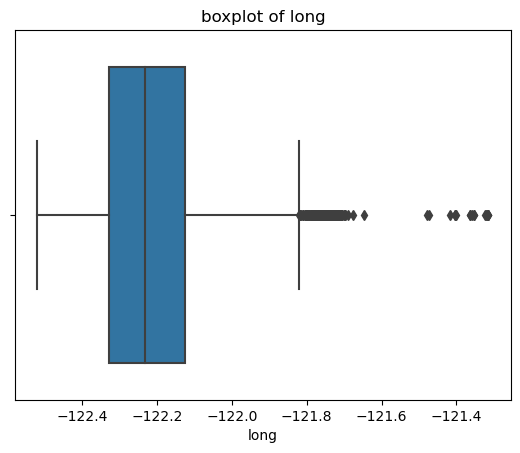

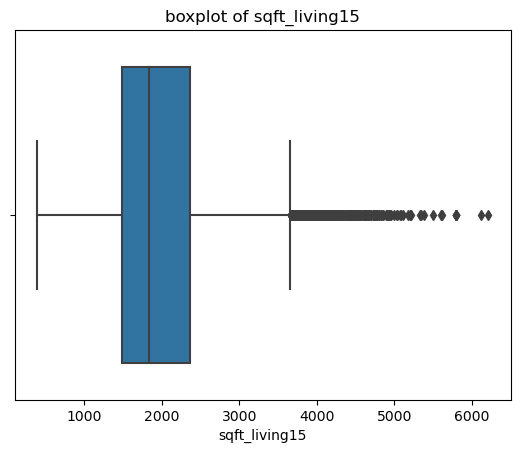

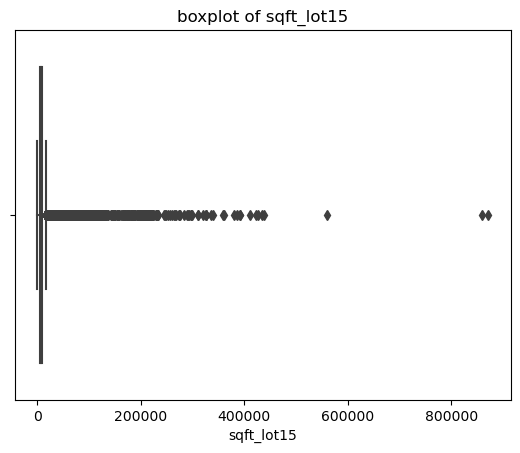

In [37]:
#Outliers
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    sns.boxplot(data=df, x=column)
    plt.title(f'boxplot of {column}')
    plt.show()

In [38]:
#scatterplot
df.select_dtypes(include = "number").columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [46]:
for i in ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']:'price'
    sns.scatterplot(data=df,x=i,y='price',)
    plt.show

IndentationError: unexpected indent (1083018394.py, line 5)

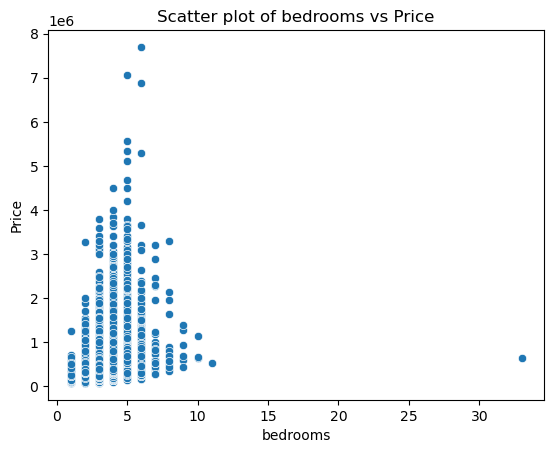

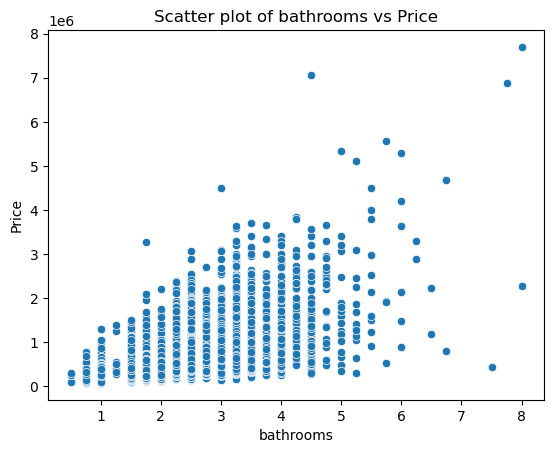

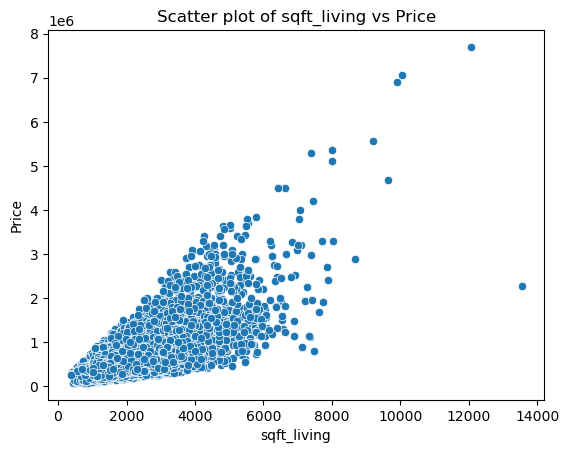

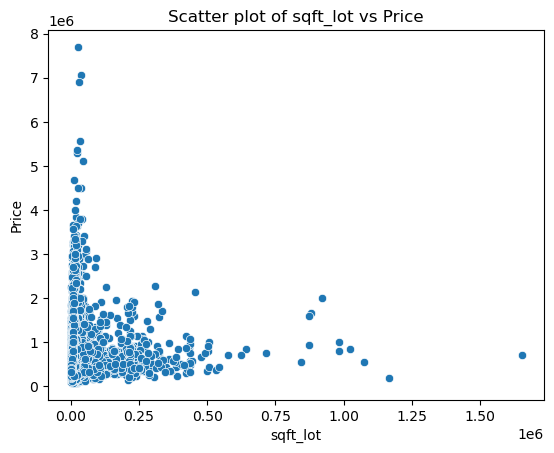

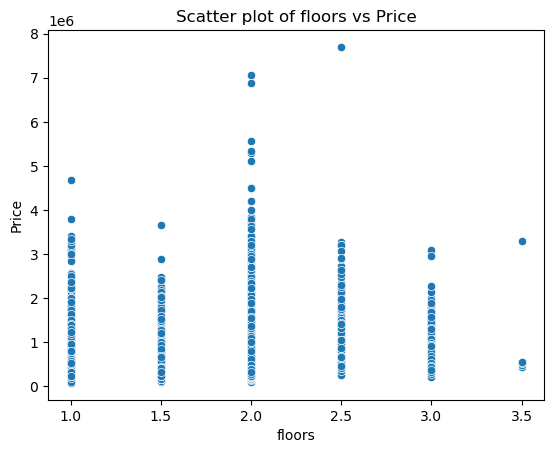

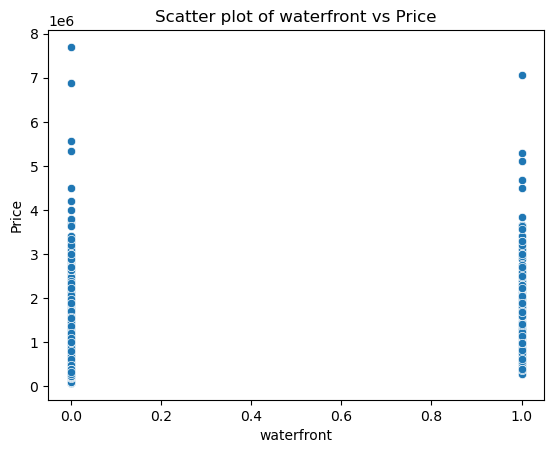

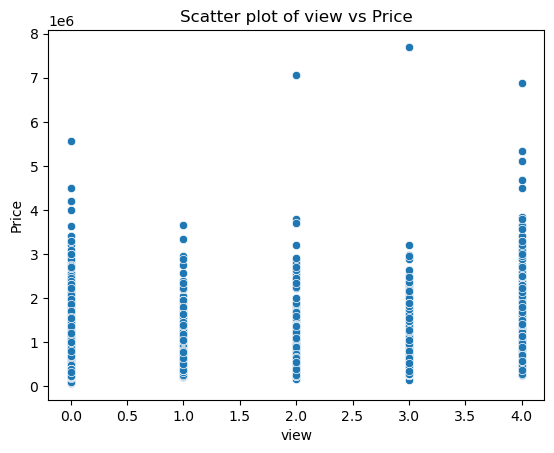

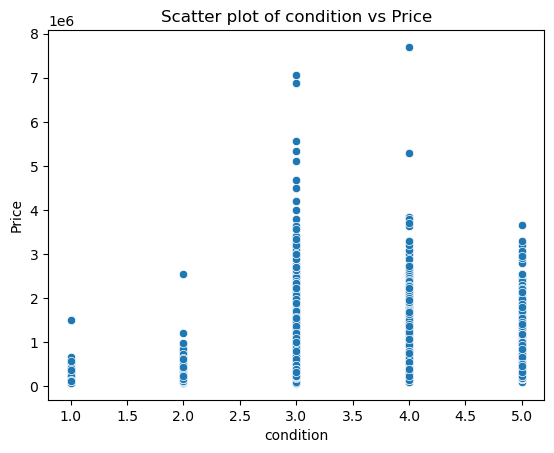

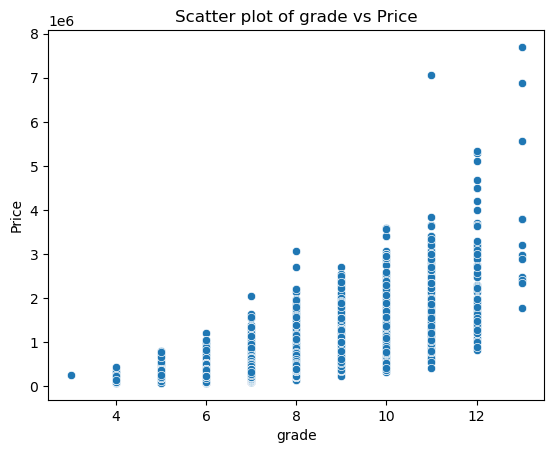

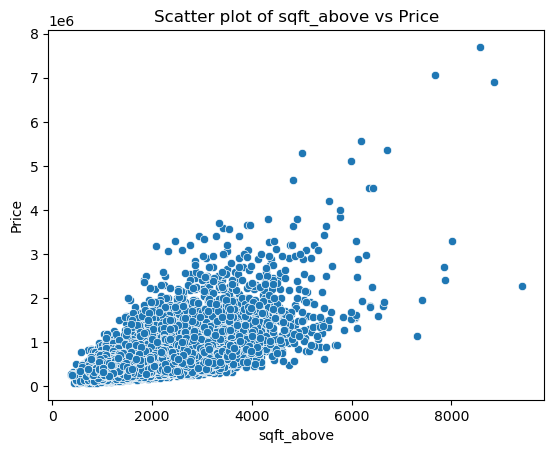

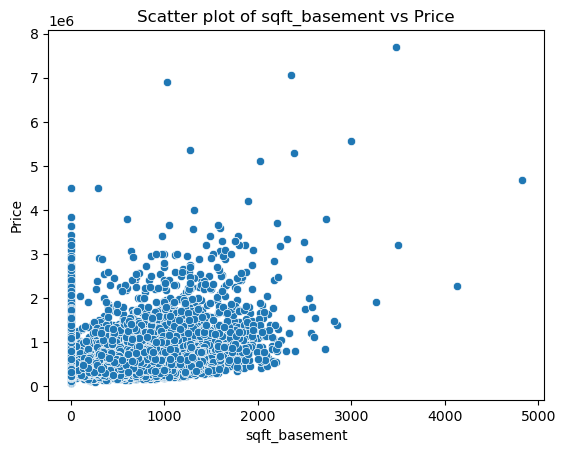

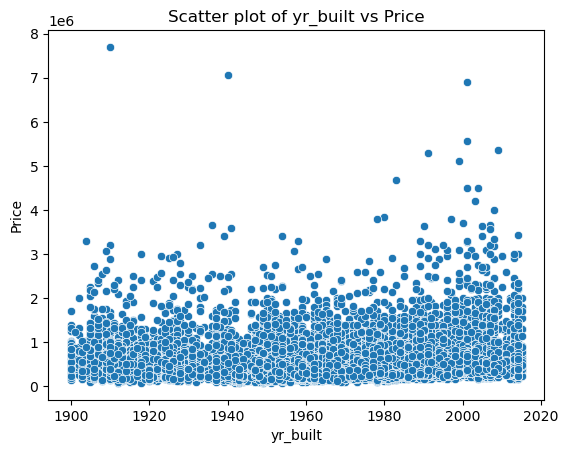

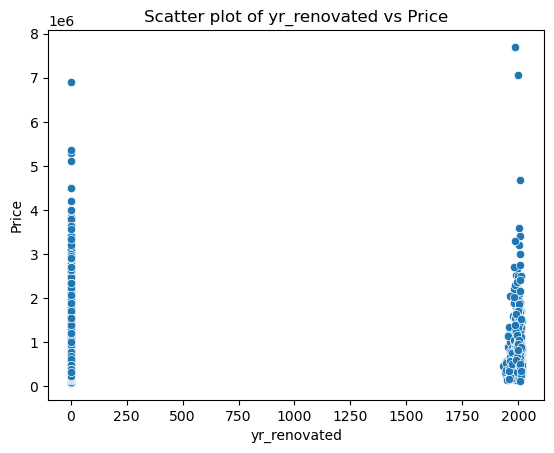

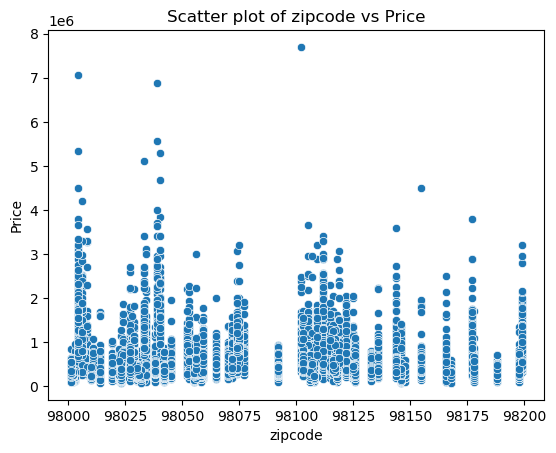

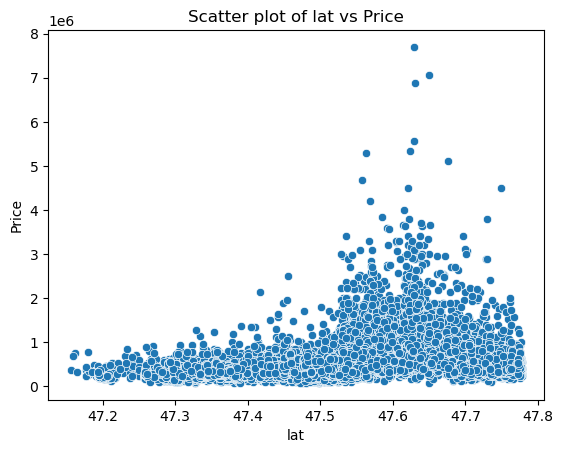

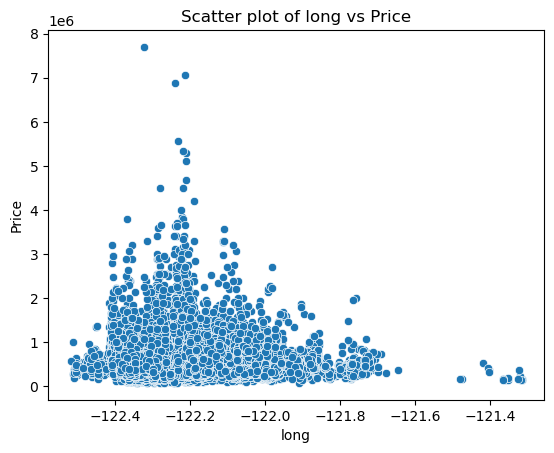

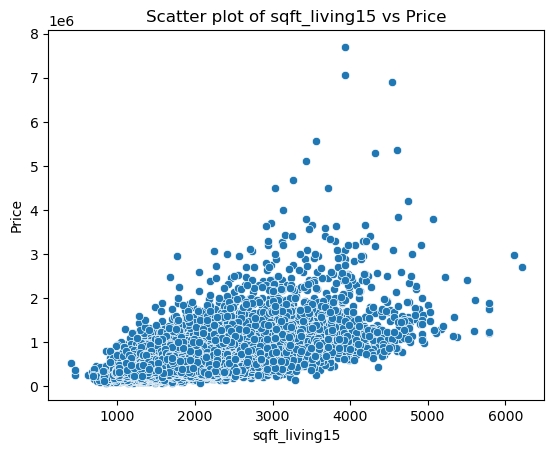

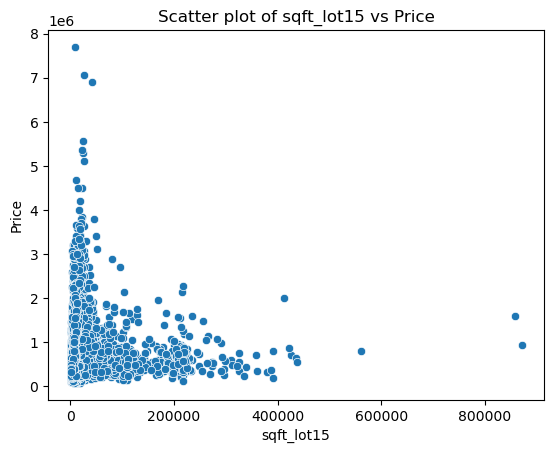

In [49]:
# List of numeric columns to plot against 'price'
numeric_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                   'floors', 'waterfront', 'view', 'condition', 'grade',
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                   'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Plot scatter plots for each numeric column against 'price'
for i in numeric_columns:
    sns.scatterplot(data=df, x=i, y='price')
    plt.title(f'Scatter plot of {i} vs Price')
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

In [50]:
#corelation with heatmap
#df.corr() gives the correlation matrix

df.select_dtypes(include = "number").columns.corr()

AttributeError: 'Index' object has no attribute 'corr'

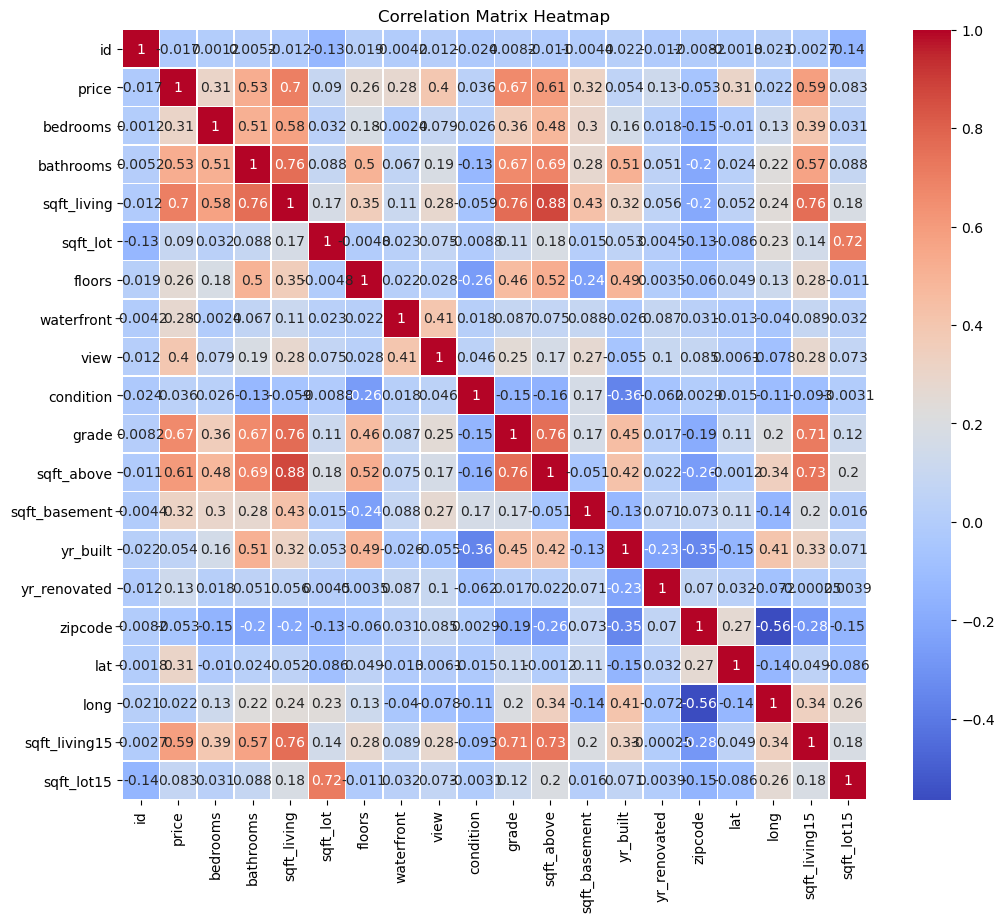

In [51]:
# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [52]:
#missing vslue
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Outliers treatment